<a href="https://colab.research.google.com/github/pixelatedAF/pixelatedAF/blob/main/TCS_Stock_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install yfinance

In [5]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import yfinance as fy
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import mean_squared_error, r2_score
 import datetime

In [6]:
df=pd.read_csv('TCS_stock_history.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [8]:
df.shape

(4463, 8)

In [9]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


###**Data Cleaning & Processing**
Are there any missing values in the dataset?

Do we have any duplicate dates, and how do we handle them?

saw dataypes and change according to data

In [10]:
#checking for null values
print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [11]:
#checking for duplicates
print(df.duplicated().sum())

0


In [12]:
#date dataype is to be changed
df["Date"]=pd.to_datetime(df["Date"])

In [13]:
df["Date"]

,Date
0,2002-08-12
1,2002-08-13
2,2002-08-14
3,2002-08-15
4,2002-08-16
...,...
4458,2021-09-24
4459,2021-09-27
4460,2021-09-28
4461,2021-09-29


In [14]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [15]:
price_col=['Open','High','Low','Close']

In [16]:
# Can we normalize the stock price values for easier comparison?
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_stand=df.copy()
df_stand[price_col]=scaler.fit_transform(df[price_col])
df_stand.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,-1.010038,-1.010451,-1.008182,-1.009041,212976,0.0,0.0
1,2002-08-13,-1.009120,-1.010107,-1.008046,-1.009523,153576,0.0,0.0
2,2002-08-14,-1.009568,-1.011116,-1.010898,-1.011943,822776,0.0,0.0
3,2002-08-15,-1.012065,-1.013589,-1.010230,-1.011943,0,0.0,0.0
4,2002-08-16,-1.012233,-1.012225,-1.010875,-1.012022,811856,0.0,0.0


### **Exploratory Data Analysis (EDA)**

 ● Price Trends: Visualize the Open, Close, High, and Low prices over time.

 ● Volume Analysis: Analyze trading volumes.

 ● Moving Averages: Calculate moving averages for trend analysis

<Axes: >

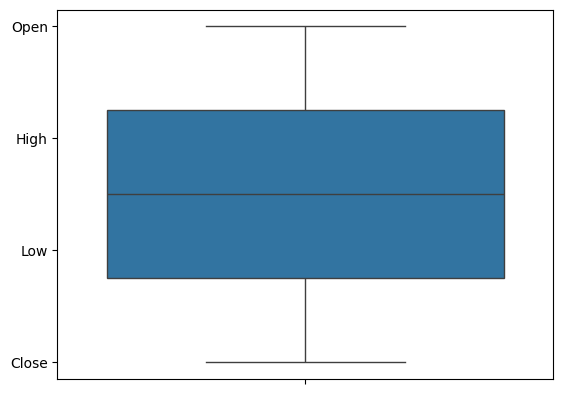

In [17]:
sns.boxplot(price_col)

indicates no outliers

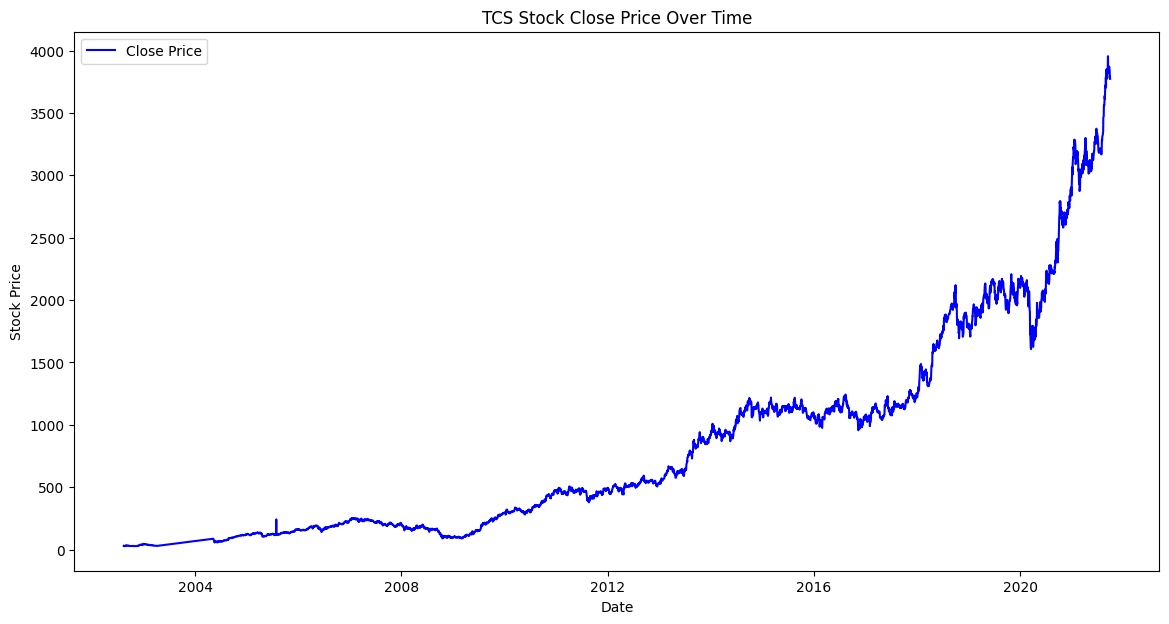

In [18]:
# Plotting Close price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], color='blue',
label='Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TCS Stock Close Price Over Time')
plt.legend()
plt.show()

In [19]:
 # Calculating 50-day and 200-day moving averages
 df['MA50'] = df['Close'].rolling(window=50).mean()
 df['MA200'] = df['Close'].rolling(window=200).mean()

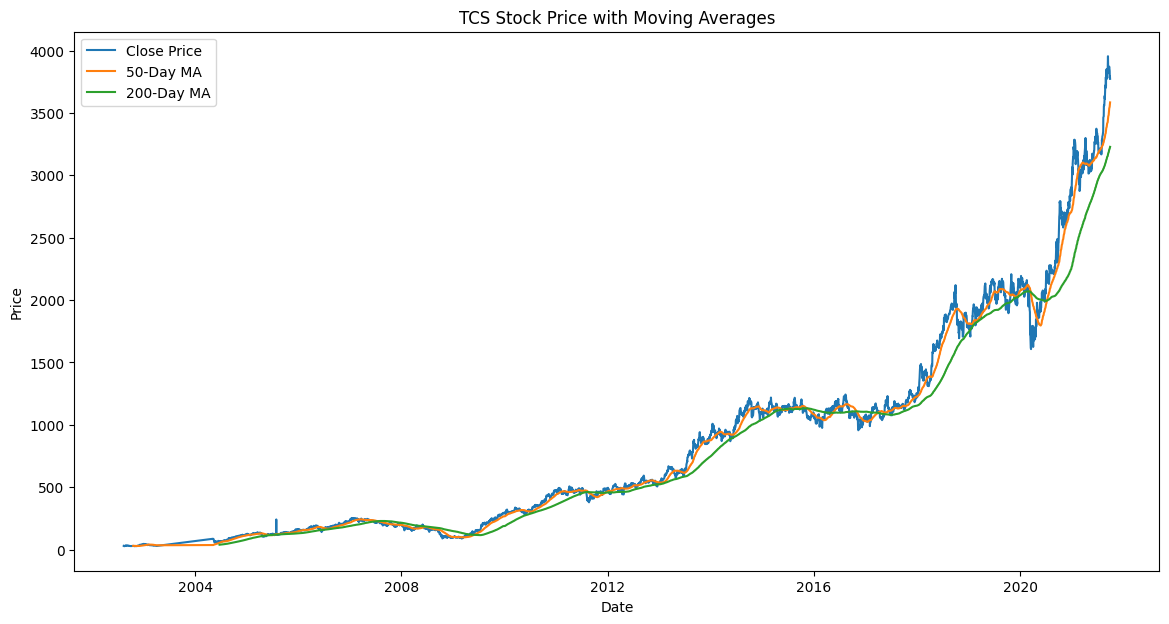

In [20]:
 # Plot with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()

###**Statistics & Insights**
What is the average closing price of TCS stock?

What is the highest and lowest closing price recorded?

On which date did the highest stock closing occur monthly?

What is the average daily price change (High - Low)?

The total number of shares traded on monthly (Volume).

What is the correlation between opening and closing prices?

What is the most volatile trading day (highest difference between High & Low)?

In [21]:
#What is the average closing price of TCS stock?
avg_closing=df["Close"].mean()
print(f"average of closing: {avg_closing:.2f}")

average of closing: 866.54


In [22]:
#What is the highest and lowest closing price recorded?
highest=df["Close"].max()
print(f"Highest Closing : {highest}")

lowest=df["Close"].min()
print(f"lowest closing : {lowest}")

Highest Closing : 3954.550048828125
lowest closing : 26.377609252929688


In [23]:
#On which date did the highest stock closing occur monthly?
monthly=df["Date"].dt.to_period("M")
g=df.groupby(monthly)["Close"].max().sort_values(ascending=False)
g

,Close
Date,
2021-09,3954.550049
2021-08,3786.449951
2021-06,3373.437988
2021-07,3334.223633
2021-04,3298.878906
...,...
2002-09,33.088188
2002-08,32.753597
2002-11,31.972868


In [24]:
# What is the average daily price change (High - Low)?
avg_daily=df["High"]-df["Low"].mean()
print(f"average daily change : {avg_daily.head()}")

average daily change : 0   -826.911644
1   -826.623517
2   -827.469314
3   -829.541973
4   -828.398761
Name: High, dtype: float64


In [25]:
# The total number of shares traded on monthly (Volume).
total_volumn=df["Volume"].sum()
total_volumn
group=df.groupby(monthly)["Volume"].sum().sort_values(ascending=False)
group

,Volume
Date,
2004-09,257695000
2004-10,229202712
2009-05,215332188
2005-04,189833784
2009-07,184646676
...,...
2002-10,5141024
2004-06,2668432
2004-07,1645640


In [26]:
# What is the correlation between opening and closing prices?
corr=df["Open"].corr(df["Close"])
print(f"correlation : {corr}")

correlation : 0.9997868195105378


In [27]:
# What is the most volatile trading day (highest difference between High & Low)?
df["volatile"]=df["High"]-df["Low"] #Volatility refers to how much a stock's price fluctuates in a given period
gro=df.groupby("Date")["volatile"].sum()
gro

,volatile
Date,
2002-08-12,0.948034
2002-08-13,1.124628
2002-08-14,2.621033
2002-08-15,0.000000
2002-08-16,1.672999
...,...
2021-09-24,89.399902
2021-09-27,101.100098
2021-09-28,98.750000


###**Visualization-Based Questions**
Can we plot a line chart showing stock price trends over time?

Can we visualize a candlestick chart for TCS stock?

How does the 7-day and 30-day moving average trend compare to the actual closing price?

Can we plot a histogram of trading volume to see distribution?

How does stock volatility (High - Low) change over time?

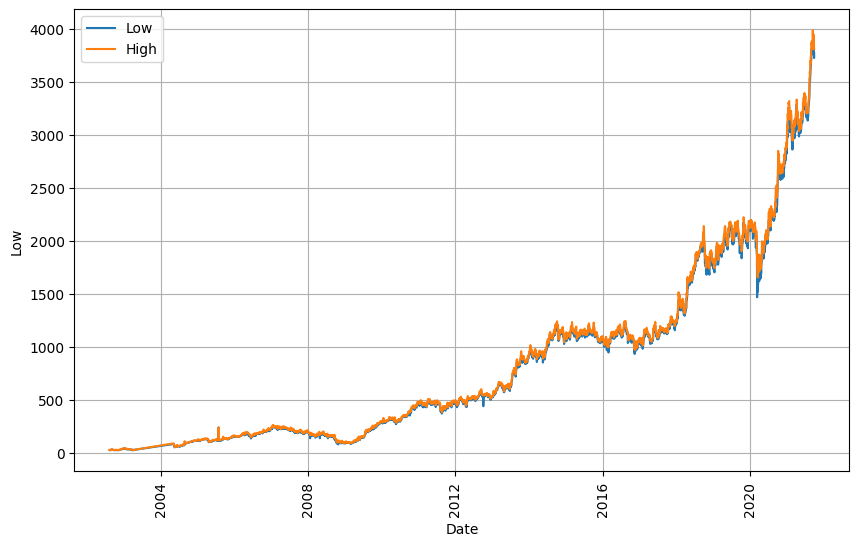

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(df,x="Date",y='Low',label=("Low"))
plt.plot(df["Date"],df["High"],label=("High"))
plt.legend()
plt.xticks(rotation=90)
plt.savefig("line.png", dpi=300, bbox_inches='tight')
plt.grid()

In [29]:
pip install -U kaleido

In [30]:
import kaleido
print("Kaleido is installed and working!")

Kaleido is installed and working!


In [31]:

import plotly.graph_objects as go


df["Date"] = pd.to_datetime(df["Date"])


fig = go.Figure(data=[go.Candlestick(
    x=df["Date"],
    open=df["Open"],
    high=df["High"],
    low=df["Low"],
    close=df["Close"],
    name="TCS Stock"
)])

fig.update_layout(
    title="TCS Stock Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Stock Price (₹)",
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    width=1000, height=600
)


fig.show()

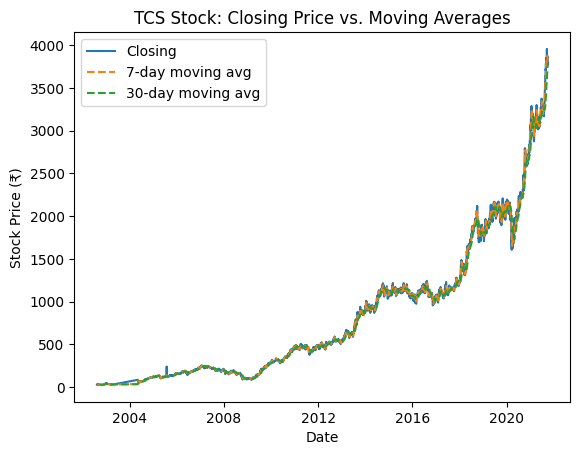

In [34]:
#How does the 7-day and 30-day moving average trend compare to the actual closing price?
df["7-day"]=df["Close"].rolling(window=7).mean()
df["30-day"]=df["Close"].rolling(window=30).mean()
plt.plot(df["Date"],df["Close"],label="Closing")
plt.plot(df["Date"],df["7-day"],label="7-day moving avg",linestyle="--")
plt.plot(df["Date"],df["30-day"],label="30-day moving avg",linestyle="--")
plt.legend()
plt.xlabel("Date")                # X-axis label
plt.ylabel("Stock Price (₹)")      # Y-axis label
plt.title("TCS Stock: Closing Price vs. Moving Averages")  # Chart title
plt.savefig("ma.png", dpi=300, bbox_inches='tight')
plt.show()

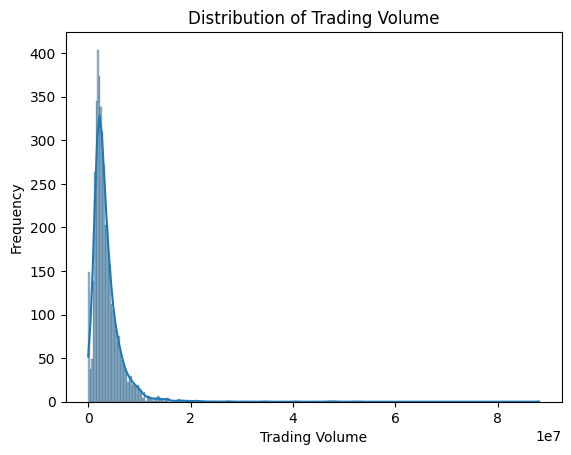

In [35]:
#Can we plot a histogram of trading volume to see distribution?
sns.histplot(df["Volume"],kde=True)
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")
plt.savefig("hist.png", dpi=300, bbox_inches='tight')
plt.show()

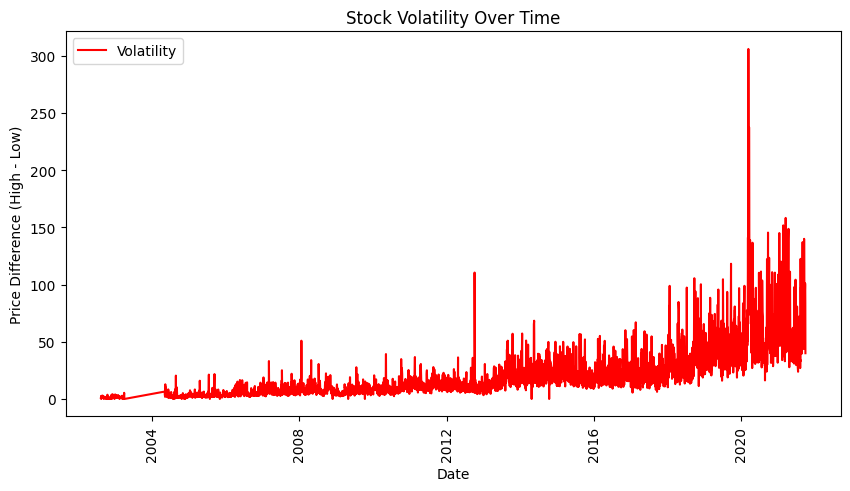

In [36]:
#How does stock volatility (High - Low) change over time?
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Date", y="volatile", color="red", label="Volatility")
plt.xlabel("Date")
plt.ylabel("Price Difference (High - Low)")
plt.title("Stock Volatility Over Time")
plt.xticks(rotation=90)
plt.legend()
plt.savefig("overtime.png", dpi=300, bbox_inches='tight')
plt.show()

In [60]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()

In [61]:
 # Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1,-1)

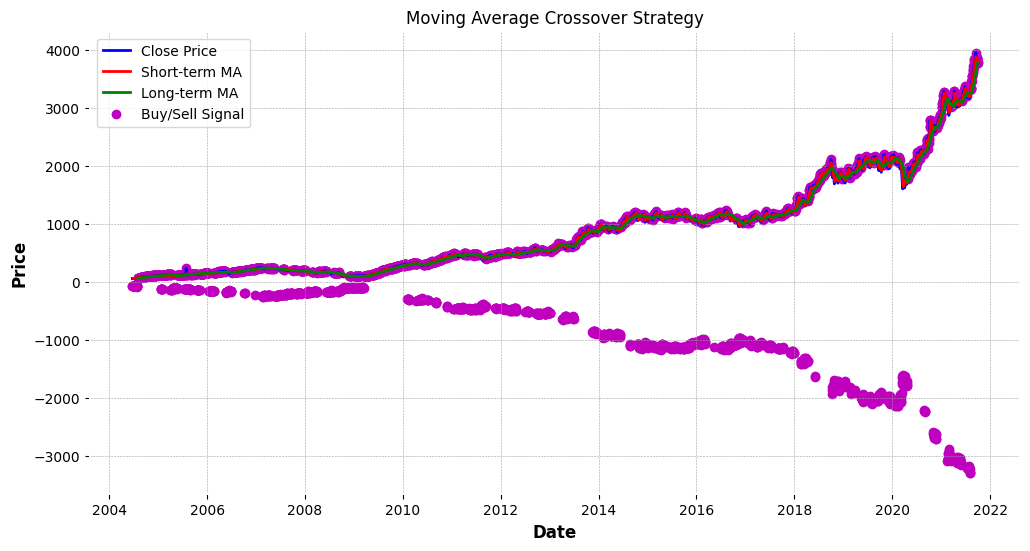

In [62]:
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

daily price change

In [63]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100

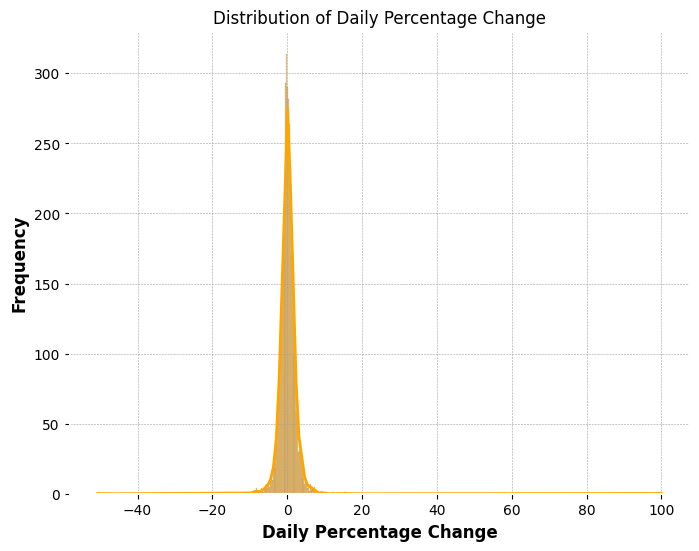

In [64]:
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [38]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




<Figure size 2000x2000 with 0 Axes>

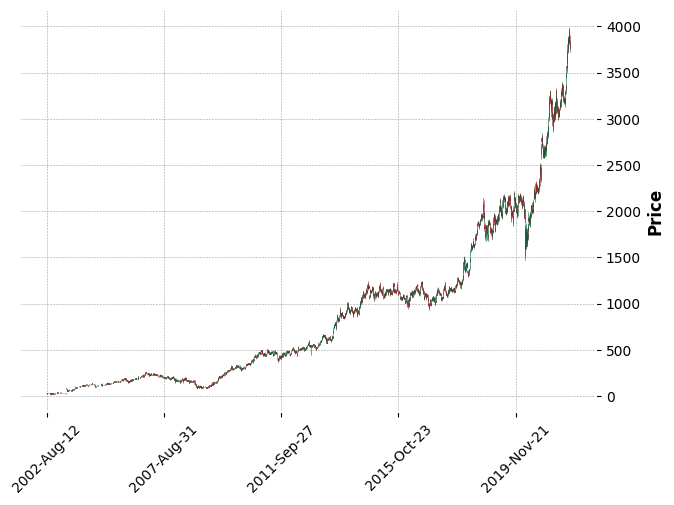

In [39]:
import mplfinance as mpf
df2=df.copy()
df2=df2.drop(["Volume","volatile","7-day","30-day"],axis=1)
df2.set_index('Date',inplace=True)
plt.figure(figsize=(20,20))
mpf.plot(df2,type='candle',style='charles')

###**Feature Engineering**
 ● Extract features like Year, Month, Day, Day of Week from Date.

 ● Create lag features (e.g., previous day’s close, previous day’s high/low)

In [40]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_Week'] = df['Date'].dt.dayofweek

In [44]:
# Lag Features
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True) # Drop rows with NaN values from shifting

### **Model Building and Prediction**
 ● UseLinear Regression to predict the Close price based on features.

 ● Train/Test Split for model evaluation

In [46]:
# Feature selection
X = df[['Open', 'High', 'Low', 'Volume', 'Prev_Close','Day_of_Week', 'Month']]
y = df['Close']

In [48]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [49]:
 # Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predictions
y_pred = model.predict(X_test)

In [51]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 46.32241428534163
R-Squared Score: 0.9999332979879454


### **Visualize Model Performance**
 ● Plot predicted vs. actual values.

 ● Scatter plot to observe prediction accuracy

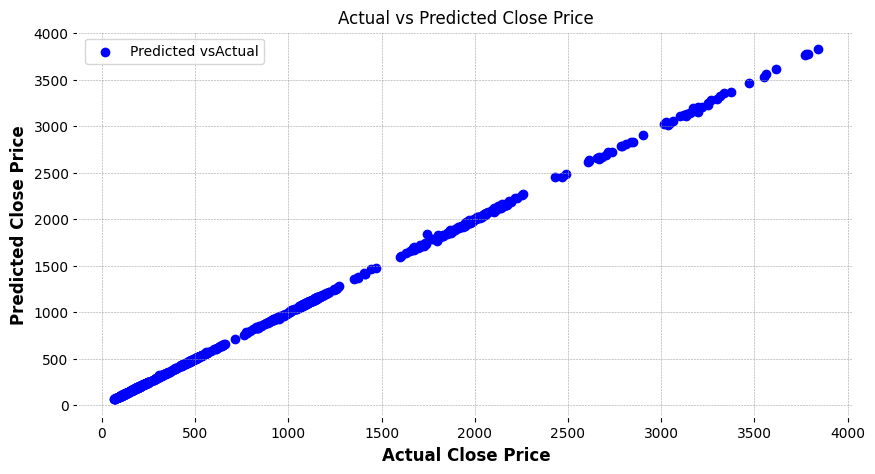

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vsActual')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

###**Save the Model**
 ● Savethe trained model for future use

In [57]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
  pickle.dump(model, file)

 ### **Future Work & Interpretation**
 ● Test different models (Random Forest, XGBoost).

 ● Usehyperparameter tuning for optimization.

 ● Explore time-series models like ARIMA for better predictions based on temporal
 data.


feature training

In [65]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

modelling

data preparation and normalisation

In [66]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

In [67]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [68]:
# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

In [69]:
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)

X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [70]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))

In [73]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Set the number of epochs and batch size
epochs = 30
batch_size = 15

In [78]:
# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
 for i in range(0, len(X_train_lstm), batch_size):
  X_batch = X_train_lstm[i:i+batch_size]
  y_batch = y_train_lstm[i:i+batch_size]
  model.train_on_batch(X_batch, y_batch)

  0%|          | 0/30 [00:00<?, ?it/s]

In [80]:
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [81]:
lstm_predictions = model.predict(X_test_lstm).flatten()


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


inverse form of predictions

In [82]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

viualization of LSTM

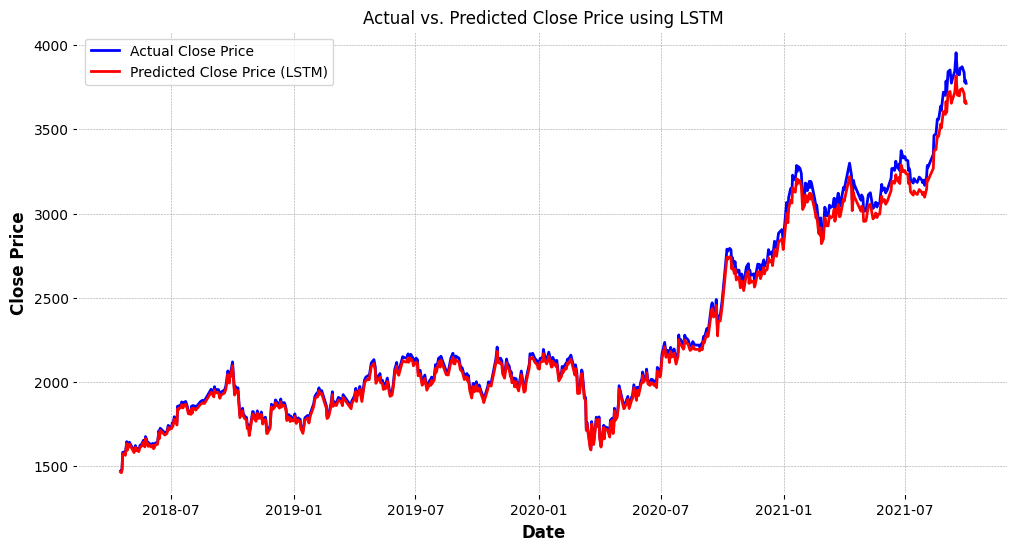

In [86]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

mean absolute eroor

In [88]:
from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(test_data['Close'],lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 33.535012831710304


In [90]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

In [91]:
date_index=test_data.index[-len(lstm_predictions):]
predictions_df=pd.DataFrame({'Date':date_index,'Predicted_Close':lstm_predictions.flatten()})

In [93]:
predictions_df.to_csv('predictions.csv',index=False)